# Multivariate Exploratory Data Analysis (EDA)

Multivariate EDA involves analyzing the relationships between three or more variables to uncover patterns, trends, and correlations. In this notebook, we will use the **Titanic** dataset to explore these relationships using **Seaborn**.

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set Seaborn theme for beautiful plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Data Loading and Cleaning

In [ ]:
# Load the dataset
df = pd.read_csv("./datasets/titanic.csv")

# Clean the data: Fill missing ages with the median and Embarked with the mode
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Multivariate Analysis with Catplot (Categorical Plots)
We can identify how different categorical variables (like Gender, Class, Embarked) interact with survival rates.

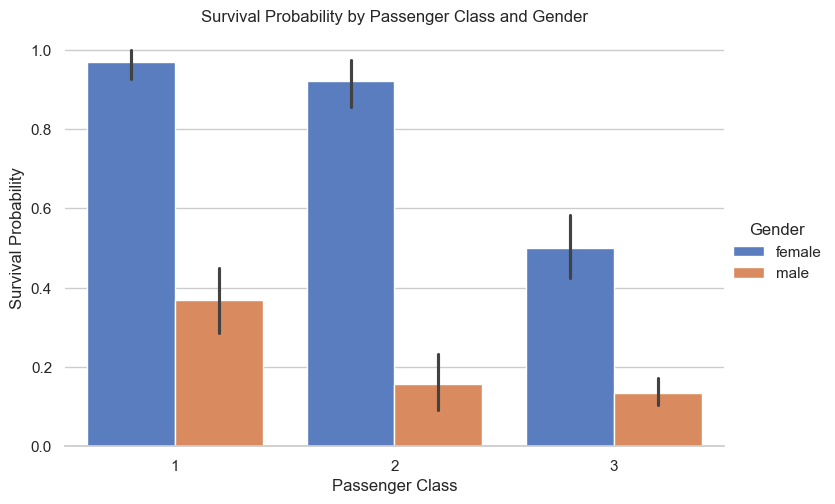

In [3]:
# Catplot: Survival Rate by Class and Gender
g = sns.catplot(
    data=df, 
    x="Pclass", 
    y="Survived", 
    hue="Gender", 
    kind="bar", 
    height=5, 
    aspect=1.5,
    palette="muted"
)
g.despine(left=True)
g.set_axis_labels("Passenger Class", "Survival Probability")
plt.title("Survival Probability by Passenger Class and Gender")
plt.show()

*Interpretation*: Females in the 1st and 2nd class had a very high chance of survival, whereas males in the 3rd class had the lowest.

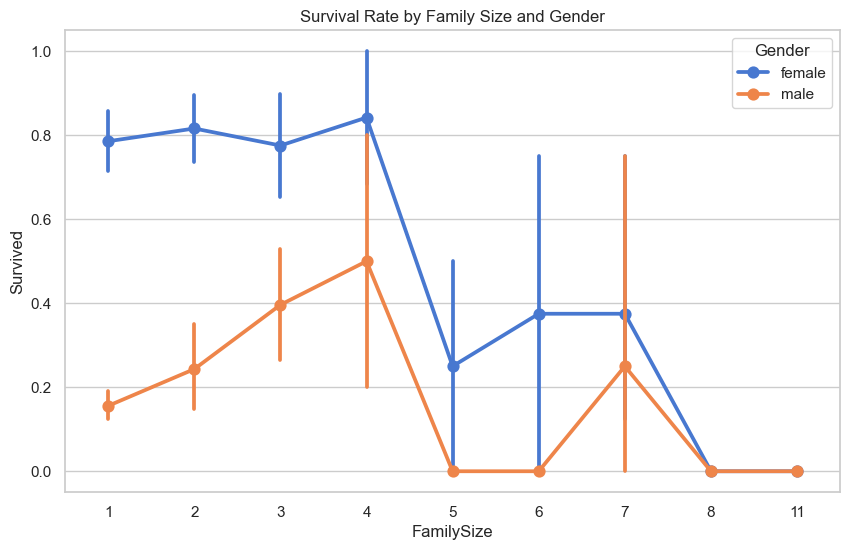

In [4]:
# Pointplot: Survival Rate by Family Size and Gender
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x="FamilySize", y="Survived", hue="Gender", palette="muted")
plt.title("Survival Rate by Family Size and Gender")
plt.show()

## 3. Multivariate Analysis with Scatter Plots (Relplot)
Let's see how Age and Fare relate to Survival.

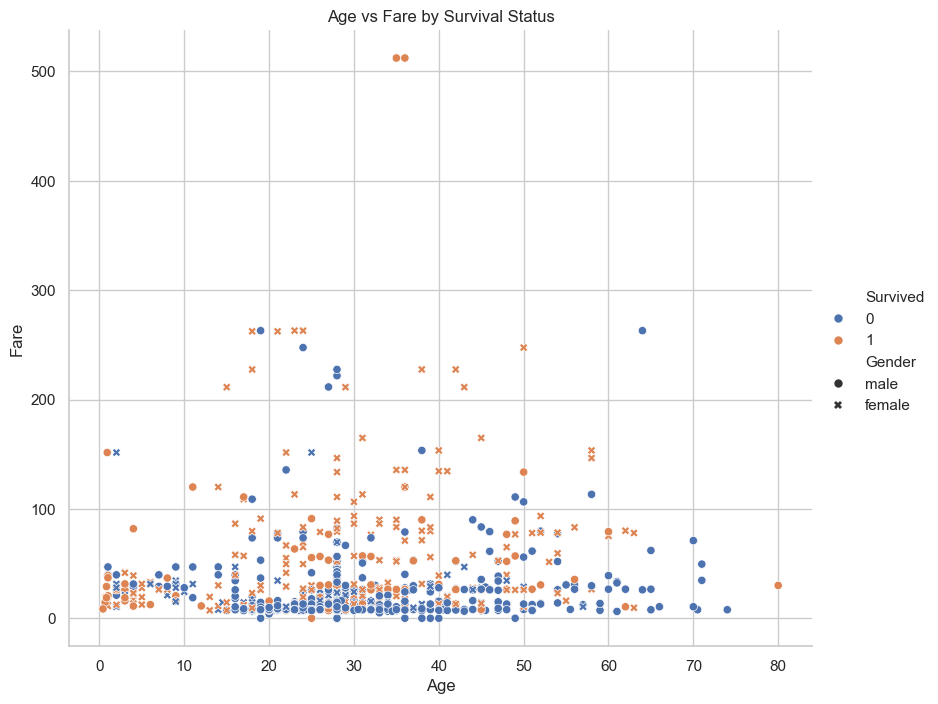

In [5]:
# Scatter plot using Relplot
sns.relplot(
    data=df,
    x="Age", 
    y="Fare", 
    hue="Survived", 
    style="Gender", 
    height=7, 
    aspect=1.2
)
plt.title("Age vs Fare by Survival Status")
plt.show()

## 4. Pair Plot
Plot multiple pairwise bivariate distributions in a dataset.

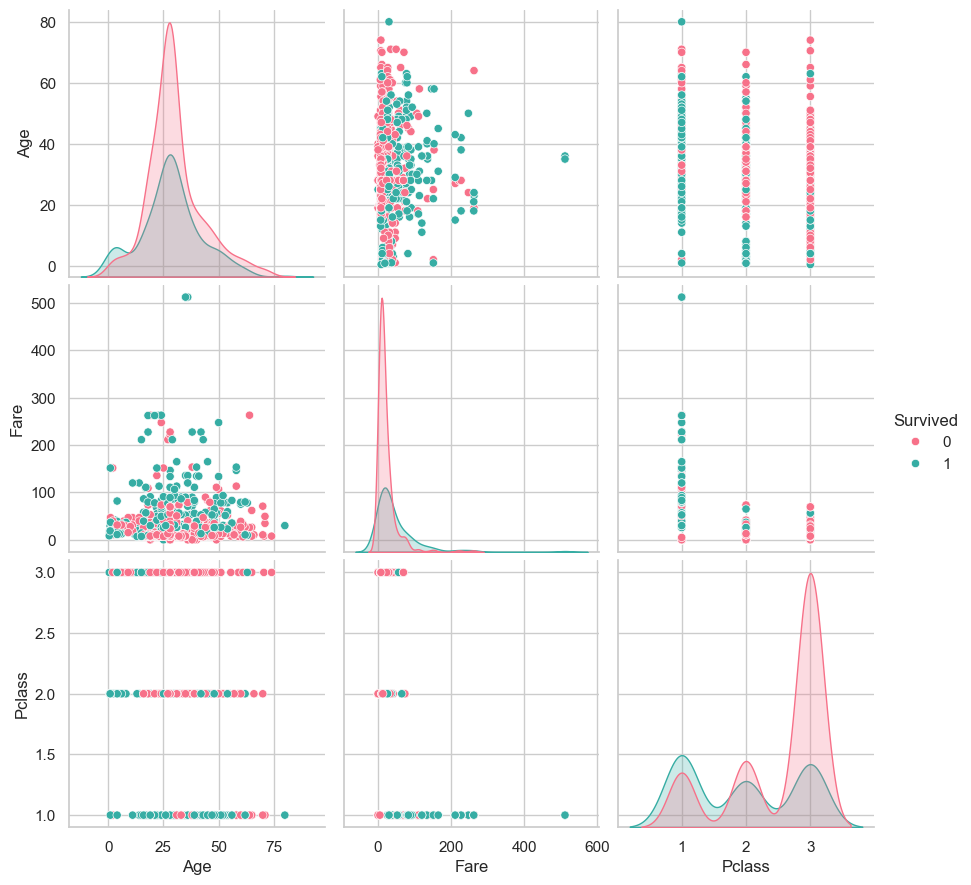

In [6]:
# Pairplot of Age, Fare, and Pclass colored by Survival
# Selecting a subset effectively filters the data for clearer visualization
cols = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(df[cols], hue='Survived', palette='husl', height=3)
plt.show()

## 5. Correlation Heatmap
Visualizing the correlation matrix to see how all numerical variables relate to each other, including Survival.

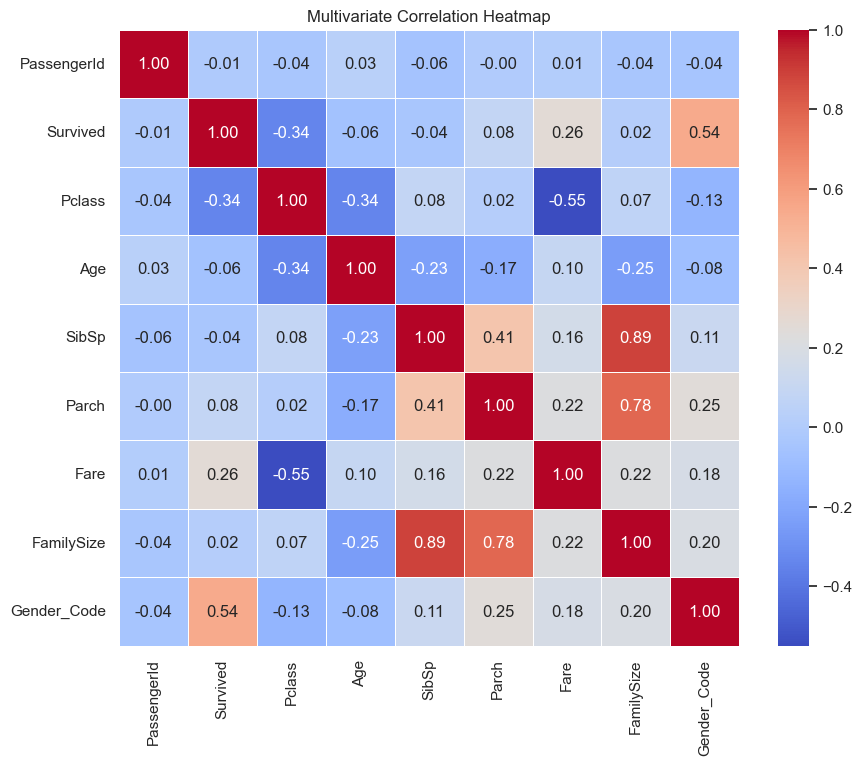

In [7]:
# Prepare data for correlation: Ensure all are numeric
# We can convert Gender to numeric to include it in the correlation matrix
df_corr = df.copy()
df_corr['Gender_Code'] = df_corr['Gender'].map({'male': 0, 'female': 1})

# Compute correlation
corr = df_corr.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Multivariate Correlation Heatmap")
plt.show()

*Interpretation*: 'Gender_Code' (gender) has a relatively strong positive correlation with 'Survived', confirming that being female increased survival chances. 'Pclass' has a negative correlation, meaning higher class numbers (3rd class) had lower survival rates.

## 6. FacetGrid
FacetGrid allows us to create a grid of plots based on a categorical variable.

In [ ]:
# FacetGrid: Age Distribution by Class and Survival
g = sns.FacetGrid(df, col='Survived', row='Pclass', height=3.5, aspect=1.6)
g.map(sns.histplot, 'Age', kde=True, color='purple')
g.add_legend()
plt.show()